#Supervised Learning In-Depth-Support Vector Machine (SVM

In [1]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy as sp
print('scipy:', sp.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import matplotlib.pyplot as plt

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

import pandas as pd
print('pandas', pd.__version__)




IPython: 3.1.0
numpy: 1.9.2
scipy: 0.15.1
matplotlib: 1.4.3
scikit-learn: 0.16.1
seaborn 0.5.1
pandas 0.16.0


In [2]:
%matplotlib inline

In [3]:
from scipy import stats

In [4]:
seaborn.set()

##Motivate Support Vector Machines (SVM)

SVMS are super awesome supervised learning algorithms used for **classification** or **regression**. SVMS are a **discriminative** classifier: they draw a boundary between clusters of data

In [5]:
from sklearn.datasets.samples_generator import make_blobs 

In [6]:
blobsX, blobsY = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=.60)

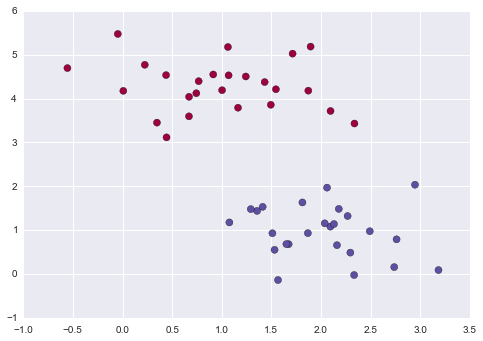

In [7]:
plt.scatter(blobsX[:, 0],blobsX[:, 1], c=blobsY, s=50, cmap='Spectral' )

Discriminative classifier attempts to draw line between two sets of data. Problem here is that we could come up with several lines which perfectly discriminate between classes here 

In [8]:
xFit = pd.Series(np.linspace(-1, 3.5))

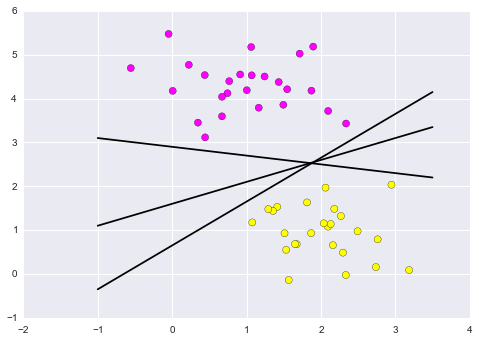

In [9]:
plt.scatter(blobsX[ :, 0], blobsX[ :, 1], c=blobsY, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2,2.9)]:
    plt.plot(xFit, m*xFit + b, '-k' )

Here have three very different seperators which actually perfectly discriminate our samples. Depending on which one we choose a new data point will be classified almost entirely differently!



###Support Vector Machines: Maximizing the Margin

Support vector machines are one way to address this. SVM not only draw a line but also consider a region around the line of some given width.

In [10]:
xFit = np.linspace(-1, 3.5)

(-1, 3.5)

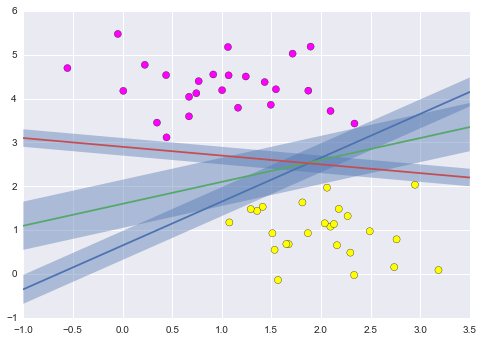

In [11]:
plt.scatter(blobsX[ :, 0], blobsX[ :, 1], c=blobsY, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6,0.55), (-0.2, 2.9, 0.2)]:
    yFit = m*xFit + b
    plt.plot(xFit, yFit)
    plt.fill_between(xFit, yFit - d, yFit + d, edgecolor='none', alpha=0.4)

plt.xlim(-1,3.5)

If we were trying to maximize the width then middle is clearly the best. This is the intuition of SVMS. Essentially they optimize a linear discriminant model in conjunction with a **margin** that represents the perpendicular distance between datasets. 

###Fitting a Support Vector Machine (SVM)

Now lets fit a support vector machine classifier to these points. This uses a likelihood model! Read all about this one Josh-Dog

In [12]:
from sklearn.svm import SVC #'Support Vector Classifier'

In [13]:
linearSVC = SVC(kernel='linear')

In [14]:
linearSVC.fit(blobsX, blobsY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
#Make convenience function to visualize what is happening (will plot SVM decision boundaries)
def plot_svc_decision_function(classifier, ax=None):
    "Plot the decision function for a 2D SVC"
    if ax is None:
        ax = plt.gca() #get current class instance on current figure matching given keyword args or create one
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y,x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = classifier.decision_function([xi, yj])
    #plot the margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-', '--'] )

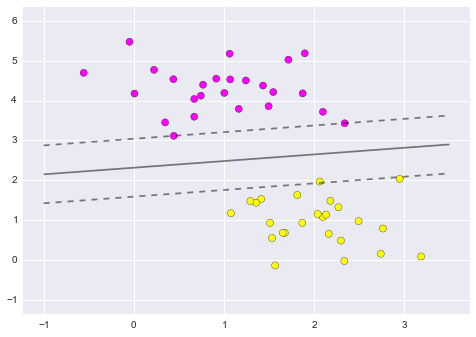

In [16]:
plt.scatter(blobsX[:, 0], blobsX[:, 1], c=blobsY, s=50, cmap='spring')
plot_svc_decision_function(linearSVC)

The dashed line here touches a couple of the points: these points are the pivotal pieces of this fit and are known as the support vectors (giving the algorithm its name). In sckit-learn these are stored in the support_vectors_attribute of the classifier

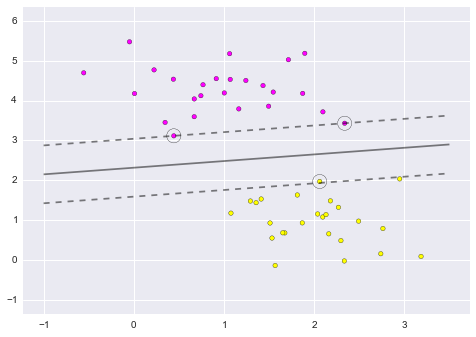

In [17]:
plt.scatter(blobsX[:, 0], blobsX[:, 1], c=blobsY, cmap='spring')
plot_svc_decision_function(linearSVC)
plt.scatter(linearSVC.support_vectors_[:, 0], linearSVC.support_vectors_[:, 1], s=200, facecolors='none')

Use Ipythons **interact** function to explore how the distribution of points affects the support vectors and the descriminative fit 

In [18]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<function __main__.plot_svm>

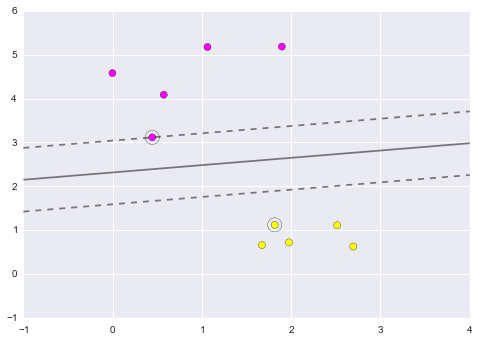

In [19]:
def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1,4)
    plt.ylim(-1,6)
    plot_svc_decision_function(linearSVC, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none')
interact(plot_svm, N=[10, 200], kernel='linear')

Unique thing about SVM is that only the support vecotrs matter. If we moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results

###Going Further: Kernel Methods

SVM is cool. SVM with kernel methods is funcking insane. Kernels are really key when our data is not linearly seperable

In [20]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=0.1)

In [21]:
circlesXDF = pd.DataFrame(X)
circlesYSeries = pd.Series(y)

In [22]:
circleSVC = SVC(kernel='linear').fit(circlesXDF, circlesYSeries)

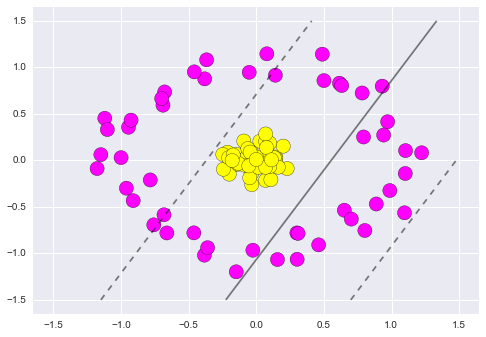

In [23]:
plt.scatter(X[:, 0], X[:,1], c=circlesYSeries, s=200, cmap='spring')
plot_svc_decision_function(circleSVC)

How COOL IS THIS? There will clearly be no linear descrimination that will split this data. We can adjust this though by applying a **kernel** which is some functional transformation of the input data

One simple model we could use is a **radial basis function**

In [24]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

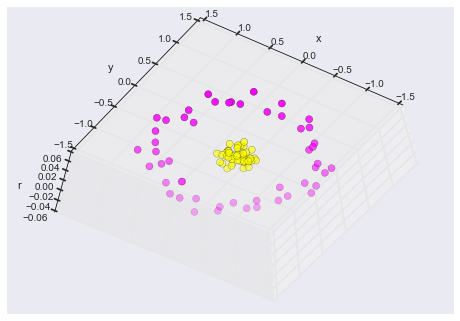

In [25]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], c=circlesYSeries, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev=[-90, 90], azip=(-180,180))

HOly shit. With this new dimension the data is clearly linearly seperable. Apparently this is a relatively simple kernel. SVM has way more sophisticated version of this kernel built-in to the proces. This is done using kernel='rbf' short for radial basis function.

In [26]:
awesomeCLF = SVC(kernel='rbf')
awesomeCLF.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

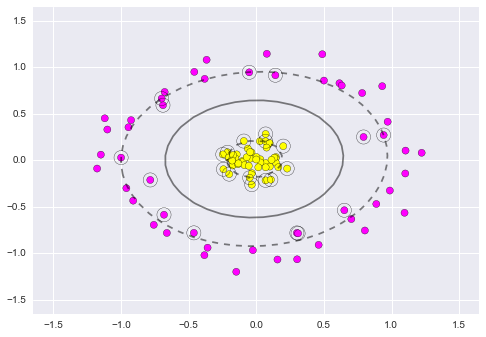

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(awesomeCLF)
plt.scatter(awesomeCLF.support_vectors_[:, 0], awesomeCLF.support_vectors_[:, 1], s=200, facecolors='none')

Here we effectivel have N basis functions: one centered at each point! We just did a clever mathematical trick and it allows the computation to proceed very efficiently using the 'Kernel Trick' without actually constructing the matrix of kernel evaluations. Da fuck?
